In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
fashion_mnist=fetch_openml('Fashion-MNIST', version=1,cache=True, as_frame=False)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
fashion_mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['9', '0', '0', ..., '8', '1', '5'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [6]:
fashion_mnist.target=fashion_mnist.target.astype(np.int8)
fashion_mnist.target

array([9, 0, 0, ..., 8, 1, 5], dtype=int8)

In [10]:
x=fashion_mnist.data/255
y=fashion_mnist.target

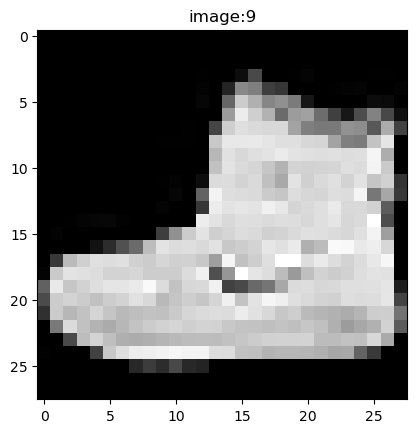

In [11]:
plt.imshow(x[0].reshape(28,28), cmap='gray')
plt.title('image:'+str(y[0]))
plt.show()

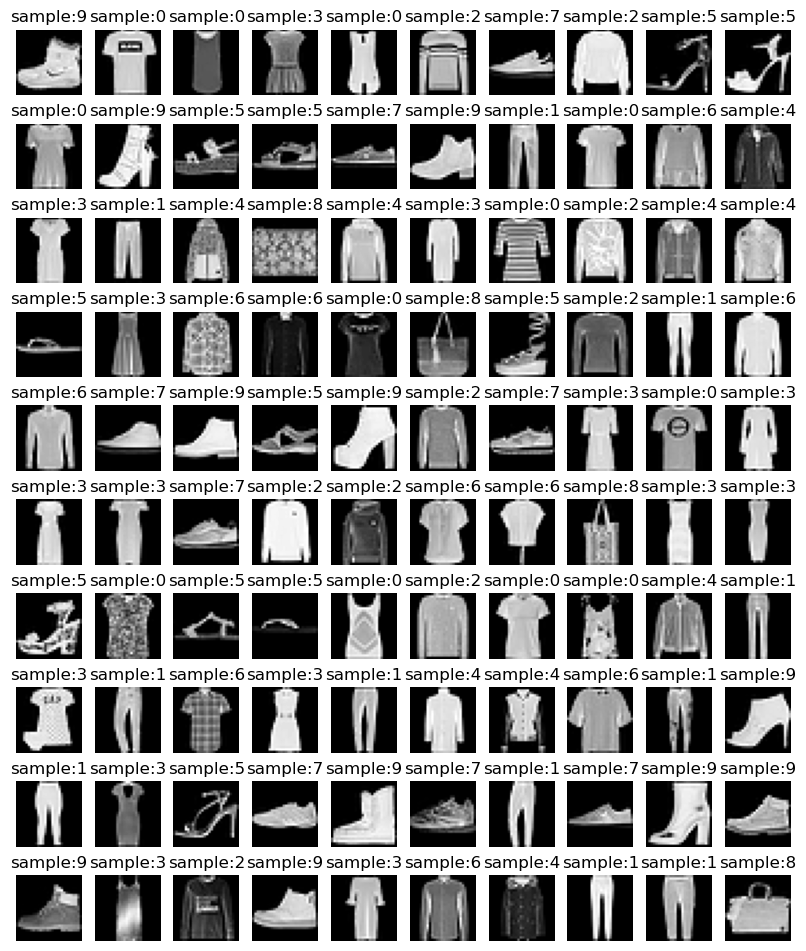

In [12]:
plt.figure(figsize=(10,12))

for i in range(100):
    plt.subplot(10,10, i+1)
    plt.axis('off')
    plt.imshow(x[i].reshape(28,28), cmap='gray')
    plt.title('sample:%i'%(y[i]))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=1/7, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [16]:
X_train=torch.FloatTensor(x_train)
X_test=torch.FloatTensor(x_test)
Y_train=torch.LongTensor(y_train)
Y_test=torch.LongTensor(y_test)

ds_train=TensorDataset(X_train, Y_train)
ds_test=TensorDataset(X_test, Y_test)
load_train=DataLoader(ds_train, batch_size=64, shuffle=True)
load_test=DataLoader(ds_test, batch_size=64, shuffle=True)

In [17]:
model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2',nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3',nn.Linear(100, 100))
model.add_module('relu3', nn.ReLU())
model.add_module('fc4',nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)


In [18]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())
print(model.parameters())

<generator object Module.parameters at 0x000001B11B07ECE0>


In [19]:
costs=[]
accuracys=[]
epochs=[]

def train(epoch):
    model.train()
    cost=0
    accuracy=0

    for data, targets, in load_train:
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output, targets)
        
        _, y_hat=torch.max(output.data, 1)# 확률이 가장 높은 레이블이 무엇인지 계산
        accuracy+=y_hat.eq(targets.data.view_as(y_hat)).sum()
        cost+=loss.item()
        loss.backward()

        optimizer.step()

    epochs.append(epoch)
    costs.append(cost)
    accuracys.append(accuracy/60000)
    print(epoch, cost, accuracy/60000)

In [20]:
def test():
    model.eval()
    correct=0

    with torch.no_grad():
        for data, targets in load_test:
            output=model(data)
            _, predicted=torch.max(output, 1)
            correct+=predicted.eq(targets.data.view_as(predicted)).sum()

    data_num=len(load_test.dataset) #총데이터 건수
    print('테스트 데이터에서 예측 정확도:', data_num, 100*correct/data_num)

In [22]:
test()

테스트 데이터에서 예측 정확도: 10000 tensor(9.4200)


In [23]:
for epoch in range(20):
    train(epoch)
test()

0 540.9962447583675 tensor(0.7907)
1 366.7571920901537 tensor(0.8579)
2 329.9824894592166 tensor(0.8706)
3 306.70648285746574 tensor(0.8791)
4 290.44811886548996 tensor(0.8852)
5 275.7632714211941 tensor(0.8906)
6 262.6603379547596 tensor(0.8946)
7 252.57395730912685 tensor(0.8992)
8 244.40447303652763 tensor(0.9011)
9 234.44333677366376 tensor(0.9049)
10 226.55660382658243 tensor(0.9084)
11 219.73751107603312 tensor(0.9108)
12 211.80435754358768 tensor(0.9140)
13 205.45743826404214 tensor(0.9168)
14 201.11302811466157 tensor(0.9179)
15 193.00648033991456 tensor(0.9227)
16 188.6749224551022 tensor(0.9234)
17 183.1409966275096 tensor(0.9258)
18 179.12377778068185 tensor(0.9282)
19 172.74864825978875 tensor(0.9295)
테스트 데이터에서 예측 정확도: 10000 tensor(89.5100)


예측결과: tensor(1)
정답: tensor(1)


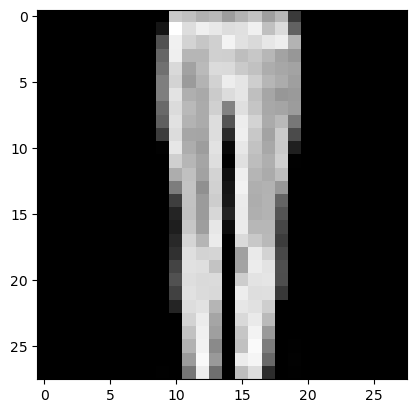

In [24]:
index=10
model.eval()
data=X_test[index]
output=model(data)
_, predicted=torch.max(output.data,0)
print("예측결과:", predicted)
print("정답:", Y_test[10])

X_test_show=(X_test[index].numpy())
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
plt.show()

In [25]:
predicteds=model(X_test)
predicted_list=[]
#print(predicteds)
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    #print(v)
    #print(index)
    predicted_list.append(index.item())
predicted=torch.from_numpy(np.array(predicted_list))
print(predicted)
print(Y_test)

tensor([9, 5, 6,  ..., 6, 9, 4], dtype=torch.int32)
tensor([9, 5, 6,  ..., 6, 9, 4])


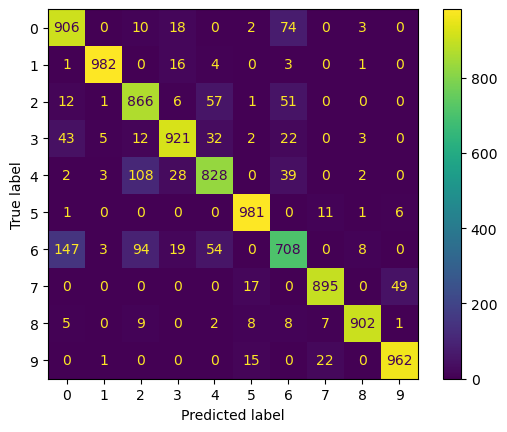

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test, predicted)
ConfusionMatrixDisplay(cm).plot()